<a href="https://colab.research.google.com/github/elansarihouria/TEXT_CLASSLFICATION/blob/master/gru_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
Sentiment analysis probably is one the most common applications in Natural Language processing. I don’t have to emphasize how important customer service tool sentiment analysis has become. So here we are, we will train a classifier movie reviews in IMDB data set, using Recurrent Neural Networks.




We will use Recurrent Neural Networks, and in particular GRUs, to perform sentiment analysis in Keras. Conveniently, Keras has a built-in IMDb movie reviews data set that we can use.

# Data Overview######




For this analysis we’ll be using a dataset of 50,000 movie reviews taken from IMDb. The data was compiled by Andrew Maas and can be found here: IMDb Reviews.

The data is split evenly with 25k reviews intended for training and 25k for testing your classifier. Moreover, each set has 12.5k positive and 12.5k negative reviews.

IMDb lets users rate movies on a scale from 1 to 10. To label these reviews the curator of the data labeled anything with ≤ 4 stars as negative and anything with ≥ 7 stars as positive. Reviews with 5 or 6 stars were left out.

# Framwork

Keras is a very popular python deep learning library, similar to TFlearn that allows to create neural networks without writing too much boiler plate code. 

In [0]:
from keras.datasets import imdb


# Preprocess the data

Set the vocabulary size and load in training and test data.

In [164]:
vocabulary_size = 25000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocabulary_size)
print('Loaded dataset with {} training samples, {} test samples'.format(len(X_train), len(X_test)))

Loaded dataset with 25000 training samples, 25000 test samples


## The code above does a couple of things at once:

    It downloads the data
    It downloads the first 25000 top words for each review
    It splits the data into a test and a training set.


Loaded dataset with 25000 training samples, 25000 test samples



In [165]:
X_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153,

If you look at the data you will realize it has been already pre-processed. All words have been mapped to integers and the integers represent the words sorted by their frequency. This is very common in text analysis to represent a dataset like this. So 4 represents the 4th most used word, 5 the 5th most used word and so on... The integer 1 is reserved reserved for the start marker, the integer 2 for an unknown word and 0 for padding. 

Inspect a sample review and its label.

In [166]:
print('---review---')
print(X_train[6])
print('---label---')
print(y_train[6])

---review---
[1, 6740, 365, 1234, 5, 1156, 354, 11, 14, 5327, 6638, 7, 1016, 10626, 5940, 356, 44, 4, 1349, 500, 746, 5, 200, 4, 4132, 11, 16393, 9363, 1117, 1831, 7485, 5, 4831, 26, 6, 2, 4183, 17, 369, 37, 215, 1345, 143, 2, 5, 1838, 8, 1974, 15, 36, 119, 257, 85, 52, 486, 9, 6, 2, 8564, 63, 271, 6, 196, 96, 949, 4121, 4, 2, 7, 4, 2212, 2436, 819, 63, 47, 77, 7175, 180, 6, 227, 11, 94, 2494, 2, 13, 423, 4, 168, 7, 4, 22, 5, 89, 665, 71, 270, 56, 5, 13, 197, 12, 161, 5390, 99, 76, 23, 2, 7, 419, 665, 40, 91, 85, 108, 7, 4, 2084, 5, 4773, 81, 55, 52, 1901]
---label---
1


Note that the review is stored as a sequence of integers. These are word IDs that have been pre-assigned to individual words,

We can use the dictionary returned by imdb.get_word_index() to map the review back to the original words.

In [167]:
word2id = imdb.get_word_index()
id2word = {i: word for word, i in word2id.items()}
print('---review with words---')
print([id2word.get(i, ' ') for i in X_train[6]])
print('---label---')
print(y_train[6])


---review with words---
['the', 'boiled', 'full', 'involving', 'to', 'impressive', 'boring', 'this', 'as', 'murdering', 'naschy', 'br', 'villain', 'council', 'suggestion', 'need', 'has', 'of', 'costumes', 'b', 'message', 'to', 'may', 'of', 'props', 'this', 'echoed', 'concentrates', 'concept', 'issue', 'skeptical', 'to', "god's", 'he', 'is', 'and', 'unfolds', 'movie', 'women', 'like', "isn't", 'surely', "i'm", 'and', 'to', 'toward', 'in', "here's", 'for', 'from', 'did', 'having', 'because', 'very', 'quality', 'it', 'is', 'and', 'starship', 'really', 'book', 'is', 'both', 'too', 'worked', 'carl', 'of', 'and', 'br', 'of', 'reviewer', 'closer', 'figure', 'really', 'there', 'will', 'originals', 'things', 'is', 'far', 'this', 'make', 'mistakes', 'and', 'was', "couldn't", 'of', 'few', 'br', 'of', 'you', 'to', "don't", 'female', 'than', 'place', 'she', 'to', 'was', 'between', 'that', 'nothing', 'dose', 'movies', 'get', 'are', 'and', 'br', 'yes', 'female', 'just', 'its', 'because', 'many', 'br'

Maximum review length and minimum review length.

In [168]:
print('Maximum review length: {}'.format(
len(max((X_train + X_test), key=len))))

Maximum review length: 2697


In [169]:
print('Minimum review length: {}'.format(
len(min((X_train + X_test), key=len))))

Minimum review length: 70


Pad sequences

In order to feed this data into our RNN, all input documents must have the same length. We will limit the maximum review length to max_words by truncating longer reviews and padding shorter reviews with a null value (0). We can accomplish this using the pad_sequences() function in Keras. For now, set max_words to 200.

In [0]:
from keras.preprocessing import sequence
max_words =200
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

# Build Model

Design an RNN model for sentiment analysis

We start building our model architecture in the code cell below. We have imported some layers from Keras that you might need but feel free to use any other layers / transformations you like.

Remember that our input is a sequence of words (technically, integer word IDs) of maximum length = max_words, and our output is a binary sentiment label (0 or 1).

In [171]:
from keras import Sequential
from keras.layers import Embedding, GRU, Dense, Dropout
embedding_size=32
model=Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(GRU(100))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 200, 32)           800000    
_________________________________________________________________
gru_8 (GRU)                  (None, 100)               39900     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 101       
Total params: 840,001
Trainable params: 840,001
Non-trainable params: 0
_________________________________________________________________
None


The two most important things in our code are the following:

    The Embedding layer and
    The GRU Layer.

Lets cover what both are doing. 

## Word embeddings

The embedding layer will learn a word embedding for all the words in the dataset. It has three arguments the input_dimension in our case the 200 words. The output dimension aka the vector space in which words will be embedded. In our case we have chosen 32 dimensions so a vector of the length of 32 to hold our word coordinates.

There are already pre-trained word embeddings (e.g. GloVE or Word2Vec) that you can download so that you don't have to train your embeddings all by yourself. Generally, these word embeddings are also based on specialized algorithms that do the embedding always a bit different, but we won't cover it here.

How can you imagine what an embedding actually is? Well generally words that have a similar meaning in the context should be embedded next to each other. Below is an example of word embeddings in a two-dimensional space:!!




Why should we even care about word embeddings? Because it is a really useful trick. If we were to feed our reviews into a neural network and just one-hot encode them we would have very sparse representations of our texts. Why? Let us have a look at the sentence "I do my job" in "bag of words" representation with a vocabulary of 1000: So a matrix that holds 1000 words (each column is one word), has four ones in it (one for I, one for do one for my and one for job) and 996 zeros. So it would be very sparse. This means that learning from it would be difficult, because we would need 1000 input neurons each representing the occurrence of a word in our sentence.

In contrast if we do a word embedding we can fold these 1000 words in just as many dimensions as we want, in our case 32. This means that we just have an input vector of 32 values instead of 1000. So the word "I" would be some vector with values (0.4,0.5,0.2,...) and the same would happen with the other words. With word embedding like this, we just need 32 input neurons. 

## GRU

The GRU is the newer generation of Recurrent Neural networks and is pretty similar to an LSTM. GRU’s got rid of the cell state and used the hidden state to transfer information. It also only has two gates, a reset gate and update gate.
GRU are capable of learning the relationships between elements in an input sequence. In our case the elements are words. So our next layer is an GRU layer with 100 memory units.

So our output of the embedding layer is a 200 times 32 matrix. Each word is represented through its position in those 32 dimensions. And the sequence is the 200 words that we feed into the GRU network.

Finally at the end we have a dense layer with one node with a sigmoid activation as the output.

Since we are going to have only the decision when the review is positive or negative we will use binary_crossentropy for the loss function. The optimizer is the standard one (adam) and the metrics are also the standard accuracy metric.


To summarize, our model is a simple RNN model with 1 embedding, 1 GRU and 1 dense layers.  840.001 parameters in total need to be trained.

# Training/Validation Split

Train and evaluate our model

We first need to compile our model by specifying the loss function and optimizer we want to use while training, as well as any evaluation metrics we’d like to measure. Specify the appropriate parameters, including at least one metric ‘accuracy’.

In [0]:
model.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

Once compiled, we can kick off the training process. There are two important training parameters that we have to specify — batch size and number of training epochs, which together with our model architecture determine the total training time.

To train the model we simply call the fit function,supply it with the training data and also tell it which data it can use for validation. That is really useful because we have everything in one call. 

The training of the model in our case take a long time , because we are only running it on the CPU instead of the GPU. When the model training happens, we observe that the loss function, it constantly  going down, this shows that the model is improving. We will make the model see the dataset 7 times, defined by the epochs parameter. The batch size defines how many samples the model will see at once - in our case 64 reviews.

In [173]:
batch_size = 64
num_epochs = 7
X_valid, y_valid = X_train[:batch_size], y_train[:batch_size]
X_train2, y_train2 = X_train[batch_size:], y_train[batch_size:]
model.fit(X_train2, y_train2, validation_data=(X_valid, y_valid),
batch_size=batch_size, epochs=num_epochs)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 24936 samples, validate on 64 samples
Epoch 1/7
24936/24936 [==============================] - 125s 5ms/step - loss: 0.4233 - accuracy: 0.7956 - val_loss: 0.2534 - val_accuracy: 0.9531
Epoch 2/7
24936/24936 [==============================] - 126s 5ms/step - loss: 0.2189 - accuracy: 0.9173 - val_loss: 0.2231 - val_accuracy: 0.9219
Epoch 3/7
24936/24936 [==============================] - 125s 5ms/step - loss: 0.1390 - accuracy: 0.9509 - val_loss: 0.2158 - val_accuracy: 0.9219
Epoch 4/7
24936/24936 [==============================] - 125s 5ms/step - loss: 0.0995 - accuracy: 0.9660 - val_loss: 0.2475 - val_accuracy: 0.9219
Epoch 5/7
24936/24936 [==============================] - 125s 5ms/step - loss: 0.0576 - accuracy: 0.9815 - val_loss: 0.5588 - val_accuracy: 0.8594
Epoch 6/7
24936/24936 [==============================] - 125s 5ms/step - loss: 0.0374 - accuracy: 0.9882 - val_loss: 0.4009 - val_accuracy: 0.8594
Epoch 7/7
24936/24936 [==============================] - 125s 5ms/step 

## Test the model

Once we have finished training the model we can easily test its accuracy. Keras provides a very handy function to do that:

In [0]:
import numpy as np
import pandas as pd

In [0]:
import seaborn as sn

In [175]:
score, acc = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (acc*100))
print("Test score: %.2f%%" % (score*100))


Accuracy: 85.40%
Test score: 56.01%


In our case the model achieved an accuracy of around 80% which is excellent, given the difficult task. 

0.85396
              precision    recall  f1-score   support

         pos       0.85      0.85      0.85     12500
         neg       0.85      0.85      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000

[[10686  1814]
 [ 1837 10663]]


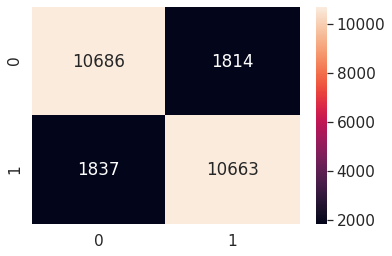

In [176]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred = model.predict_classes(np.array(X_test))
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))
target_names = ['pos', 'neg']
cnf_matrix_test = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, target_names=target_names))
print(cnf_matrix_test)
df_cm = pd.DataFrame(cnf_matrix_test, range(2), range(2))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='d')

According to the confusion matrix, 10663 positive reviews were correctly predicted (True Positive) and 10686 negative samples were correctly predicted (True Negative) . And number of incorrect predictions are 1837 (False Positive)  and 1814 (False Negative).

In [177]:
TP = cnf_matrix_test[1, 1]
TN = cnf_matrix_test[0, 0]
FP = cnf_matrix_test[0, 1]
FN = cnf_matrix_test[1, 0]

classification_error = (FP + FN) / float(TP + TN + FP + FN)
precision=TP/float(TP+FP)
print('classification error:')
print(classification_error)
print('precision:')
print(precision)

classification error:
0.14604
precision:
0.8546124869760359


Misclassification rate is calculated and found as 0.14768

#save model to disk
JSON is a simple file format for describing data hierarchically.

Keras provides the ability to describe any model using JSON format with a to_json() function. This can be saved to file and later loaded via the model_from_json() function that will create a new model from the JSON specification.

The weights are saved directly from the model using the save_weights() function and later loaded using the symmetrical load_weights() function.

The example below trains and evaluates our model on the IMDB dataset. The model is then converted to JSON format and written to model.json in the local directory. The network weights are written to model.h5 in the local directory.

The model and weight data is loaded from the saved files and a new model is created. It is important to compile the loaded model before it is used. This is so that predictions made using the model can use the appropriate efficient computation from the Keras backend.

In [127]:
#serialize model to JSON
model_json = model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)
#serialize weights to HDF5
model.save_weights("model.h5")
print("saved model to disk")



saved model to disk


## Predict something

Of course at the end we want to use our model in an application. So we want to use it to create predictions. In order to do so we need to translate our sentence into the corresponding word integers and then pad it to match our data.

In [128]:
#predicting for new datasets
from keras.preprocessing import text
from keras.models import model_from_json
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
json_file = open('model.json','r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

#load weights into new model
loaded_model.load_weights("gru_model.h5")

#compile and evaluate loaded model
loaded_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

tokenizer = Tokenizer(nb_words=2500, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ')

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/text.py:178: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


In [0]:
#this has to be loaded for new text conversion into vectors
word_index = imdb.get_word_index()

In [0]:
def sentiment(text):
    tokenizedText= text_to_word_sequence(text)
    numericText = np.array([word_index[word] if (word in word_index) and (word_index[word]<25000) else 0 for word in tokenizedText])
    numeric_inp = sequence.pad_sequences([numericText],maxlen=max_words)
    out = loaded_model.predict(numeric_inp)
    return out

now we will predict some opinion on social media


In [145]:
#positive opinion
doc1="I think social media is a great tool to have access to. I love how convenient it makes it to stay in contact with friends and family. On the downside, I don't think people value face-to-face interactions as much anymore. I also think people can be much ruder/meaner when hiding behind a keyboard."
print(sentiment(doc1))

[[0.9990151]]


In [147]:
#positive opinion
doc2="People use social media to vent about everything from customer service to politics, but the downside to this is that our feeds often resemble an endless stream of stress. In 2015, researchers at the Pew Research Center based in Washington DC sought to find out if social media induces more stress than it relieves. "
print(sentiment(doc2))

[[0.03993706]]


In this case a value close to 0 means the sentiment was negative and a value close to 1 means its a positive review. You can also use "model.predict_classes" to just get the classes of positive and negative. 

# Conclusion or what’s next?

So we have built quite a cool sentiment analysis for IMDB reviews that predicts if a movie review is positive or negative with 90% accuracy. With this we are already quite close to industry standards.The big benefit while comparing our self-built solution with an SaaS solution on the market is that we own our data and model. We can now deploy this model on our own infrastructure and use it as often as we like. Google or Amazon never get to see sensitive customer data, which might be relevant for certain business cases. We can train it with Arabic or other language given that we find a nice dataset, or simply build one ourselves. 